<a href="https://colab.research.google.com/github/SidharthBhasin0068/DataCleaning/blob/main/User_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
#load the dataset and store it in a variable by the name of data
data = pd.read_csv("/content/drive/MyDrive/user_behavior_dataset.csv")

In [ ]:
#read or fetching out the dataste , so that we know the formats
data.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
623,624,OnePlus 9,Android,42,1.8,417,15,284,21,Male,1
506,507,Xiaomi Mi 11,Android,238,5.1,1408,45,941,27,Male,3
257,258,Xiaomi Mi 11,Android,272,5.0,1655,45,686,19,Female,3
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4
421,422,iPhone 12,iOS,168,3.2,716,38,414,43,Male,2


In [ ]:
#To find out the null values
null_values = data.isnull().sum()
print(null_values)



User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [ ]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


         Device Model Operating System  User Count
3        Xiaomi Mi 11          Android         146
4           iPhone 12              iOS         146
0      Google Pixel 5          Android         142
1           OnePlus 9          Android         133
2  Samsung Galaxy S21          Android         133
         Device Model  Gender  User Count
0      Google Pixel 5  Female          69
1      Google Pixel 5    Male          73
2           OnePlus 9  Female          61
3           OnePlus 9    Male          72
4  Samsung Galaxy S21  Female          54
5  Samsung Galaxy S21    Male          79
6        Xiaomi Mi 11  Female          78
7        Xiaomi Mi 11    Male          68
8           iPhone 12  Female          74
9           iPhone 12    Male          72
          Device Model Age Group  User Count
0       Google Pixel 5     18-25          29
1       Google Pixel 5     26-35          35
2       Google Pixel 5     36-45          31
3       Google Pixel 5     46-55          34
4      

<ipython-input-19-cc8cb08a37f6>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  device_age_popularity = data.groupby(['Device Model' , 'Age Group']).size().reset_index(name = 'User Count')


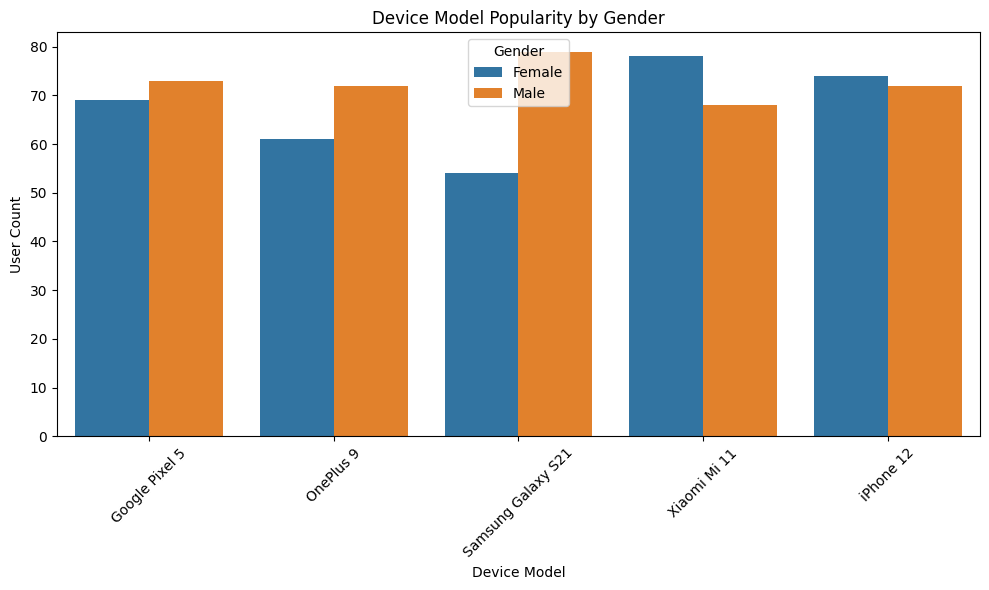

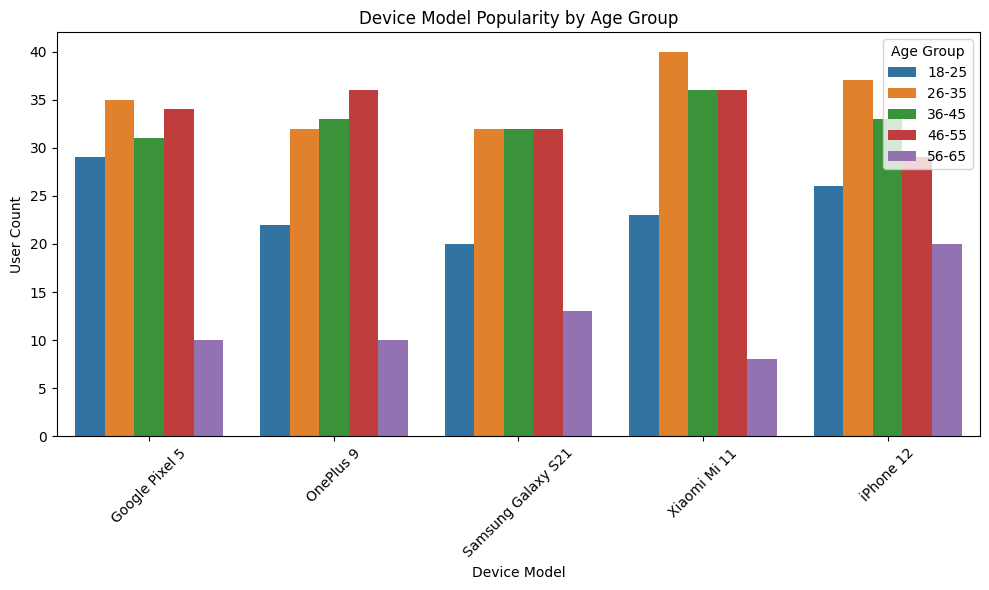

In [ ]:
# Group by Device Model and Operating System, and count users
device_os_popularity = data.groupby(['Device Model','Operating System']).size().reset_index(name = 'User Count')
#print(device_os_popularity)

#sortvalues according to user count
device_os_popularity = device_os_popularity.sort_values(by = "User Count",ascending = False)
print(device_os_popularity)

#Group by device model and gender and count users
device_gender_popularity= data.groupby(['Device Model' , 'Gender']).size().reset_index(name = 'User Count')
print(device_gender_popularity)

# Group by Device Model and Age to explore age group preferences
# You can create custom age bins if needed (e.g., 18-25, 26-35, etc.)
age_bins = [18, 25, 35, 45, 55, 65]
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

device_age_popularity = data.groupby(['Device Model' , 'Age Group']).size().reset_index(name = 'User Count')
print (device_age_popularity)


# Visualize Device Model popularity by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Device Model', y='User Count', hue='Gender', data=device_gender_popularity)
plt.title('Device Model Popularity by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualize Device Model popularity by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Device Model', y='User Count', hue='Age Group', data=device_age_popularity)
plt.title('Device Model Popularity by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-14-8bf9a9b02276>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  os_age_gender_counts = data.groupby(['Operating System', 'Age Group', 'Gender']).size().reset_index(name='User Count')


<Figure size 1200x600 with 0 Axes>

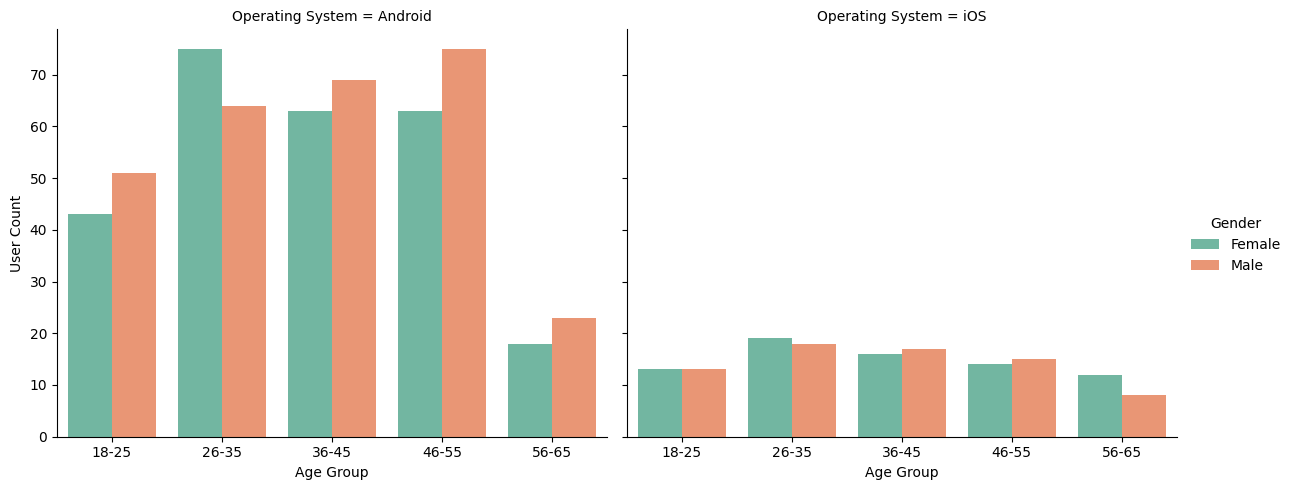

In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Device Model and Age to explore age group preferences
# You can create custom age bins if needed (e.g., 18-25, 26-35, etc.)
age_bins = [18, 25, 35, 45, 55, 65]
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Step 1: Group by 'Operating System', 'Age Group', and 'Gender' and count users
os_age_gender_counts = data.groupby(['Operating System', 'Age Group', 'Gender']).size().reset_index(name='User Count')

# Step 2: Plot the data using seaborn
plt.figure(figsize=(12, 6))

# Create a bar plot with Age Group on x-axis, User Count on y-axis, and separate by Operating System and Gender
# Uncomment the sns.barplot line to visualize this specific plot
#sns.barplot(x='Age Group', y='User Count', hue='Gender', data=os_age_gender_counts, palette='Set2', dodge=True)

# Add title and labels
'''plt.title('iOS vs Android Users by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')'''

# Create separate plots for iOS and Android by faceting
g = sns.catplot(x='Age Group', y='User Count', hue='Gender', col='Operating System',
                data=os_age_gender_counts, kind='bar', height=5, aspect=1.2, palette='Set2')

# Show the plot
plt.show()


In [ ]:
# Group by Device Model and Age to explore age group preferences
# You can create custom age bins if needed (e.g., 18-25, 26-35, etc.)
age_bins = [18, 25, 35, 45, 55, 65]
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

screen_and_app_usage = data.groupby(['App Usage Time (min/day)', 'Screen On Time (hours/day)','Age Group', 'Gender']).size().reset_index(name='User Count')
print(screen_and_app_usage)

        App Usage Time (min/day)  Screen On Time (hours/day) Age Group  \
0                             30                         1.0     18-25   
1                             30                         1.0     18-25   
2                             30                         1.0     26-35   
3                             30                         1.0     26-35   
4                             30                         1.0     36-45   
...                          ...                         ...       ...   
417955                       598                        12.0     36-45   
417956                       598                        12.0     46-55   
417957                       598                        12.0     46-55   
417958                       598                        12.0     56-65   
417959                       598                        12.0     56-65   

        Gender  User Count  
0       Female           0  
1         Male           0  
2       Female          

<ipython-input-34-b5f767402f0d>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  screen_and_app_usage = data.groupby(['App Usage Time (min/day)', 'Screen On Time (hours/day)','Age Group', 'Gender']).size().reset_index(name='User Count')


In [ ]:
data.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
602,603,OnePlus 9,Android,122,3.0,922,32,373,43,Male,2,36-45
377,378,Google Pixel 5,Android,458,6.0,1875,63,1072,31,Female,4,26-35
407,408,OnePlus 9,Android,395,7.3,2291,61,1049,55,Female,4,46-55
635,636,Samsung Galaxy S21,Android,96,3.4,1198,39,401,48,Female,2,46-55
679,680,iPhone 12,iOS,33,1.8,334,16,113,36,Female,1,36-45


<ipython-input-37-8c2255b7bb7a>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_stats = data.groupby(['Age Group', 'Gender']).agg(


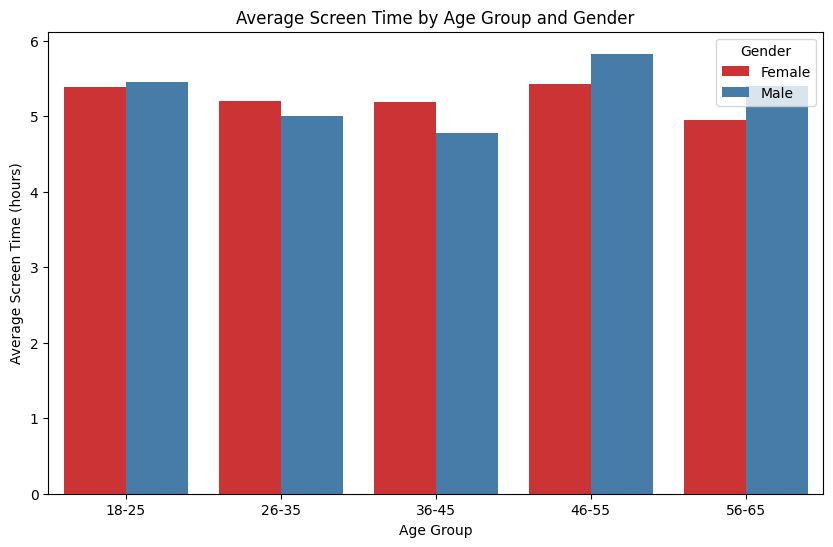

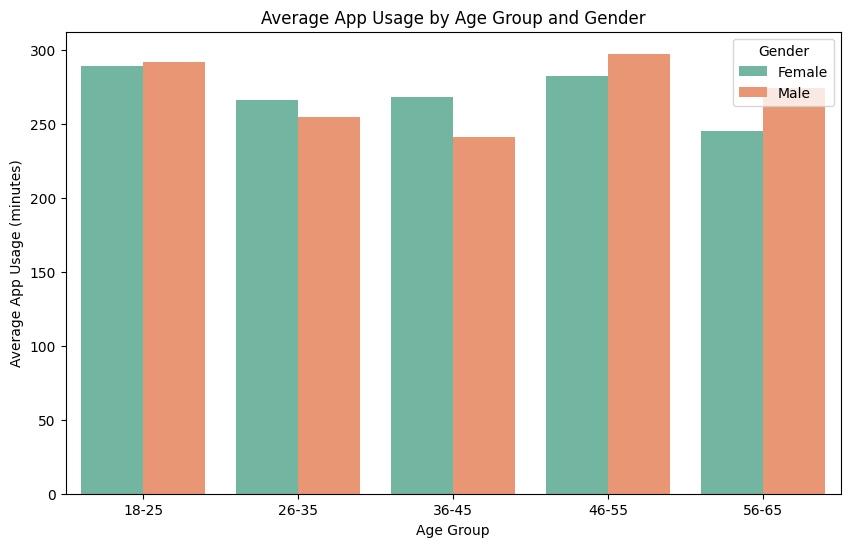

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have data loaded into 'data' DataFrame
# Define age groups (if not already done)
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Group by 'Age Group' and 'Gender', and calculate the average 'Screen Time' and 'App Usage'
usage_stats = data.groupby(['Age Group', 'Gender']).agg(
    avg_screen_time=('Screen On Time (hours/day)', 'mean'),
    avg_app_usage=('App Usage Time (min/day)', 'mean')
).reset_index()

# Visualize average screen time by age group and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='avg_screen_time', hue='Gender', data=usage_stats, palette='Set1')
plt.title('Average Screen Time by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Screen Time (hours)')
plt.show()

# Visualize average app usage by age group and gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='avg_app_usage', hue='Gender', data=usage_stats, palette='Set2')
plt.title('Average App Usage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average App Usage (minutes)')
plt.show()


In [ ]:
battery_drain_stats = data.groupby(['Age Group', 'Gender']).agg(
    avg_screen_time=('Screen On Time (hours/day)', 'mean'),
    avg_battery_drain=('Battery Drain (mAh/day)', 'mean')
).reset_index()

# Sort the results by average battery drain to identify the groups with the highest drain
battery_drain_stats = battery_drain_stats.sort_values(by='avg_battery_drain', ascending=False)

# Display the results
print(battery_drain_stats)

  Age Group  Gender  avg_screen_time  avg_battery_drain
7     46-55    Male         5.830000        1651.133333
1     18-25    Male         5.457813        1631.406250
0     18-25  Female         5.391071        1626.482143
9     56-65    Male         5.406452        1597.096774
6     46-55  Female         5.431169        1578.870130
4     36-45  Female         5.196203        1488.240506
2     26-35  Female         5.197872        1481.191489
3     26-35    Male         4.998780        1446.512195
8     56-65  Female         4.953333        1373.300000
5     36-45    Male         4.781395        1368.116279


<ipython-input-50-9ebfd4b5741f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  battery_drain_stats = data.groupby(['Age Group', 'Gender']).agg(


In [ ]:
data.sample(5)

,User ID,Device Model,Operating System,App Usage Time (hours/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
264,265,iPhone 12,iOS,5.566667,6.8,2000,77,1079,40,Female,4,36-45
567,568,OnePlus 9,Android,1.433333,1.7,312,16,227,32,Male,1,26-35
432,433,Google Pixel 5,Android,8.900000,10.4,2672,90,1702,51,Male,5,46-55
631,632,Samsung Galaxy S21,Android,3.600000,5.1,1483,54,977,45,Female,3,36-45
530,531,Xiaomi Mi 11,Android,9.816667,11.8,2629,86,2479,43,Female,5,36-45


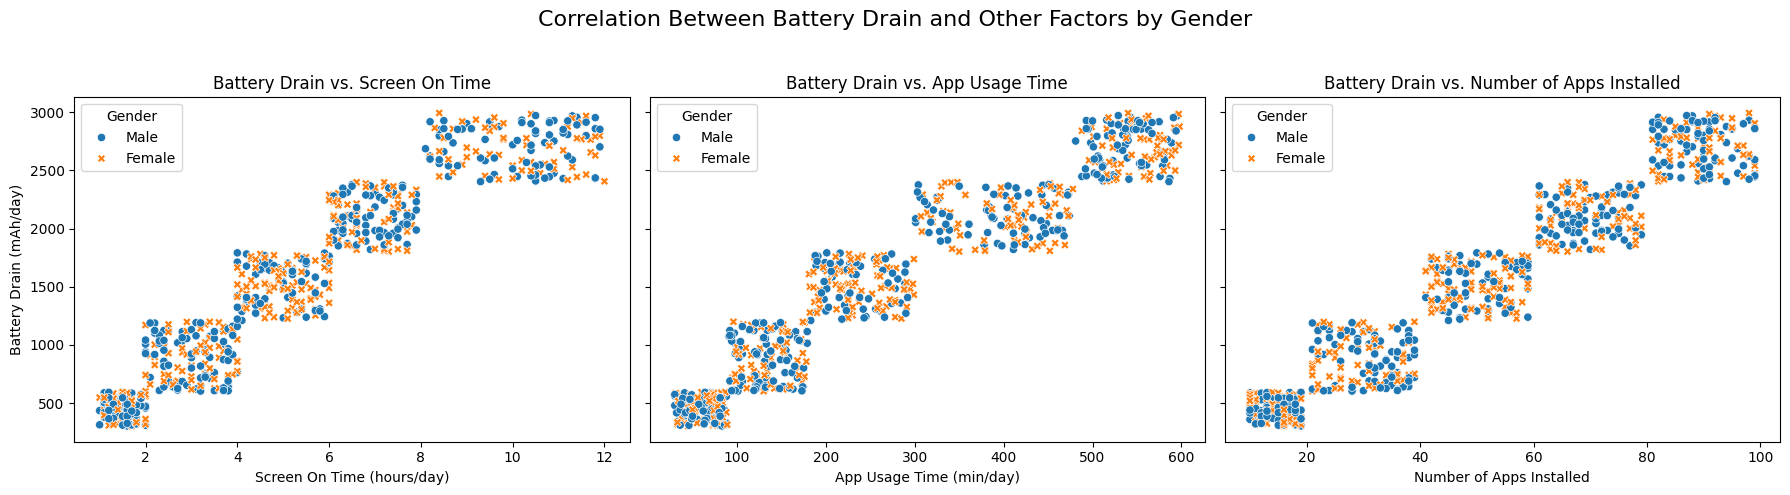

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting area
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle("Correlation Between Battery Drain and Other Factors by Gender", fontsize=16)

# Scatter plot for Battery Drain vs. Screen On Time
sns.scatterplot(data=data, x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)',
                hue='Gender', style='Gender', ax=axes[0])
axes[0].set_title("Battery Drain vs. Screen On Time")
axes[0].set_xlabel("Screen On Time (hours/day)")
axes[0].set_ylabel("Battery Drain (mAh/day)")

# Scatter plot for Battery Drain vs. App Usage Time
sns.scatterplot(data=data, x='App Usage Time (min/day)', y='Battery Drain (mAh/day)',
                hue='Gender', style='Gender', ax=axes[1])
axes[1].set_title("Battery Drain vs. App Usage Time")
axes[1].set_xlabel("App Usage Time (min/day)")
axes[1].set_ylabel("")

# Scatter plot for Battery Drain vs. Number of Apps Installed
sns.scatterplot(data=data, x='Number of Apps Installed', y='Battery Drain (mAh/day)',
                hue='Gender', style='Gender', ax=axes[2])
axes[2].set_title("Battery Drain vs. Number of Apps Installed")
axes[2].set_xlabel("Number of Apps Installed")
axes[2].set_ylabel("")

# Show plot
plt.legend(title='Gender')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [ ]:
data.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

<ipython-input-10-7885ffd029dc>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_battery_drain_by_age = data.groupby('Age Group')['Battery Drain (mAh/day)'].mean().sort_values(ascending=False)
<ipython-input-10-7885ffd029dc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_battery_drain_by_age.index, y=average_battery_drain_by_age.values, palette="viridis")


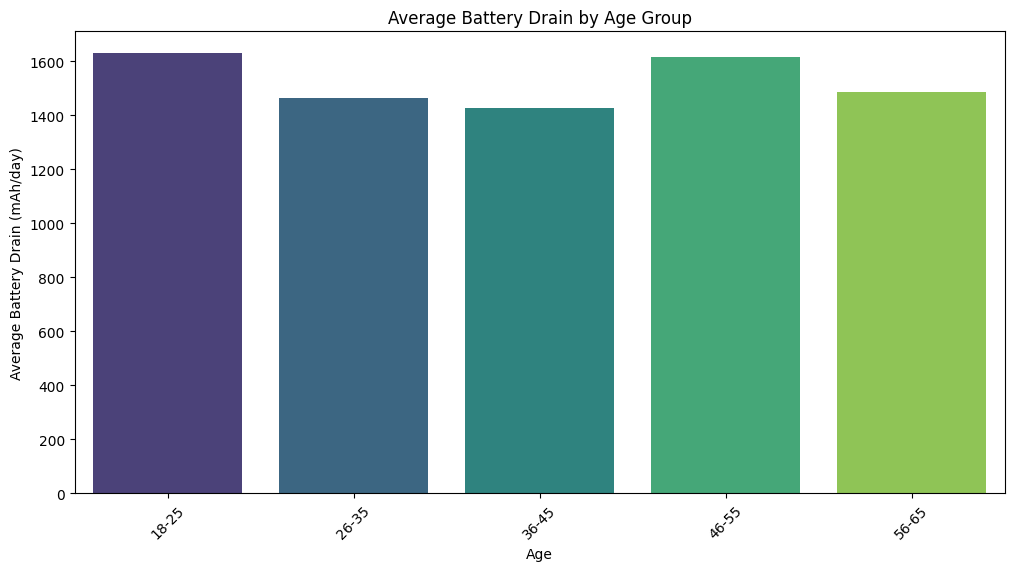

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by Age and calculate the average battery drain for each age group
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)


average_battery_drain_by_age = data.groupby('Age Group')['Battery Drain (mAh/day)'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=average_battery_drain_by_age.index, y=average_battery_drain_by_age.values, palette="viridis")
plt.title("Average Battery Drain by Age Group")
plt.xlabel("Age")
plt.ylabel("Average Battery Drain (mAh/day)")
plt.xticks(rotation=45)
plt.show()

In [12]:
data.sample(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
250,251,OnePlus 9,Android,42,1.4,324,13,272,29,Female,1,26-35
96,97,iPhone 12,iOS,550,9.5,2916,91,1946,20,Male,5,18-25
178,179,Xiaomi Mi 11,Android,207,5.7,1582,52,692,38,Male,3,36-45
131,132,Xiaomi Mi 11,Android,320,7.2,2056,69,1226,52,Female,4,46-55
425,426,Samsung Galaxy S21,Android,130,2.8,1062,24,579,37,Male,2,36-45


<ipython-input-15-ca92b95ddd33>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['App Usage Time (min/day)'].fillna(data['App Usage Time (min/day)'].mean(), inplace=True)
<ipython-input-15-ca92b95ddd33>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

Model Accuracy: 72.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       110
           1       0.10      0.03      0.05        30

    accuracy                           0.73       140
   macro avg       0.44      0.48      0.45       140
weighted avg       0.63      0.73      0.67       140



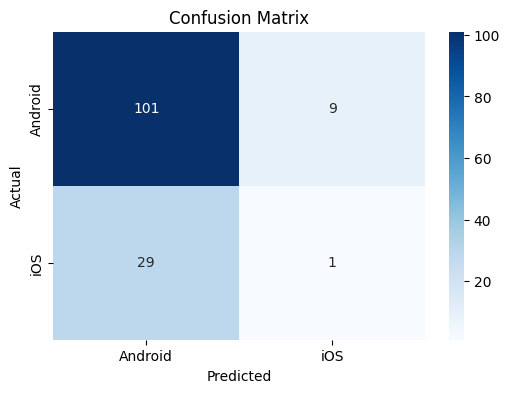

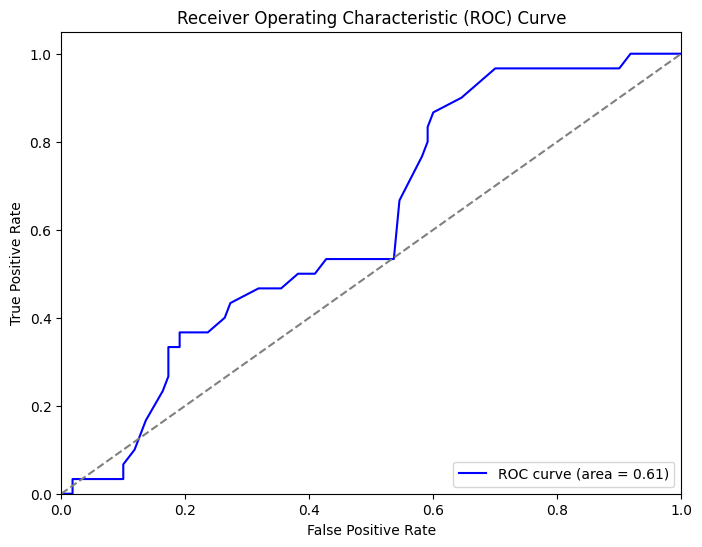

In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Step 1: Load the dataset (replace with your dataset path)
#data = pd.read_csv('/mnt/data/user_behavior_dataset.csv')

# Step 2: Handle missing values (fill missing values in 'App Usage Time' and 'Screen On Time' with their mean)
data['App Usage Time (min/day)'].fillna(data['App Usage Time (min/day)'].mean(), inplace=True)
data['Screen On Time (hours/day)'].fillna(data['Screen On Time (hours/day)'].mean(), inplace=True)

# Step 3: Convert categorical variables into numerical formats
# Encode 'Operating System' (e.g., Android = 0, iOS = 1)
data['Operating System'] = data['Operating System'].map({'Android': 0, 'iOS': 1})

# Encode 'Gender' (Male = 1, Female = 0)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Step 4: Select features (X) and the target variable (y)
X = data[['Age', 'Gender', 'App Usage Time (min/day)', 'Screen On Time (hours/day)']]  # Features
y = data['Operating System']  # Target: Android (0) or iOS (1)

# Step 5: Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Android', 'iOS'], yticklabels=['Android', 'iOS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability predictions for the positive class (iOS)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [30]:
data.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [4]:

# Group by Device Model and Age to explore age group preferences
# You can create custom age bins if needed (e.g., 18-25, 26-35, etc.)
age_bins = [18, 25, 35, 45, 55, 65]
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=['18-25', '26-35', '36-45', '46-55', '56-65'])


# Step 1: Group by 'Operating System', 'Age Group', and 'Gender' and count users
os_age_gender_counts = data.groupby(['Operating System', 'Age Group', 'Gender']).size().reset_index(name='User Count')

# Step 2: Plot the data using seaborn
plt.figure(figsize=(12, 6))



# Create separate plots for iOS and Android by faceting
g = sns.catplot(x='Age Group', y='User Count', hue='Gender', col='Operating System',
                data=os_age_gender_counts, kind='bar', height=5, aspect=1.2, palette='Set2')

# Show the plot
plt.show()


<ipython-input-4-b7fdc6f54796>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  os_age_gender_counts = data.groupby(['Operating System', 'Age Group', 'Gender']).size().reset_index(name='User Count')


TypeError: 'module' object is not callable